# Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df1 = pd.read_csv('car-mpg.csv')
#df1.describe()

In [27]:
df1.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name',
       'car_make'],
      dtype='object')

Data Cleaning:

In [23]:
def car_make(car_name):
    return str(car_name).split()[0]
#take the first word from the car make
df1['car_make']=df1['car_name'].map(car_make)

#There are some spelling mistakes change them
df1.loc[df1['car_make'] == 'chevroelt','car_make' ] = 'chevrolet'
df1.loc[df1['car_make'] == 'maxda','car_make' ] = 'mazda'
df1.loc[df1['car_make'] == 'mercedes-benz','car_make' ] = 'mercedes'
df1.loc[df1['car_make'] == 'toyouta','car_make' ] = 'toyota'
df1.loc[(df1['car_make'] == 'vokswagen') | (df1['car_make'] == 'vw'),'car_make' ] = 'volkswagen'
#there are some missing entries which are mared as '?'
df1.hp[df1['hp']=='?']='85'
#convert the string to numeric
df1['hp']=pd.to_numeric(df1['hp'])
df1


<ipython-input-23-a1b4c9fdc952>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.hp[df1['hp']=='?']='85'


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,car_make
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,volkswagen
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


In [24]:
#df1.groupby(['yr','car_make']).mean().reset_index()

df2= df1.groupby(['car_make']).agg({'mpg':'mean', 'cyl':'min', 'disp':'mean', 'hp':'mean', 'wt':'mean', 'acc':'mean', 'yr':'max', 'origin':'min'})
df2=df2.reset_index()
df2

,car_make,mpg,cyl,disp,hp,wt,acc,yr,origin
0,amc,18.246429,4,250.178571,113.642857,3280.642857,15.264286,82,1
1,audi,26.714286,4,111.857143,86.714286,2556.142857,15.942857,80,2
2,bmw,23.750000,4,121.000000,111.500000,2417.000000,12.650000,77,2
3,buick,19.182353,4,272.941176,136.411765,3553.352941,14.700000,82,1
4,cadillac,19.750000,8,350.000000,152.500000,4140.000000,14.750000,79,1
5,capri,25.000000,4,140.000000,92.000000,2572.000000,14.900000,76,1
6,chevrolet,20.370455,4,238.136364,112.750000,3290.136364,15.393182,82,1
7,chevy,18.000000,4,258.666667,142.333333,3717.000000,15.466667,82,1
8,chrysler,17.266667,4,330.166667,153.666667,3912.000000,13.300000,82,1
9,datsun,31.113043,4,103.260870,83.826087,2242.217391,16.408696,82,3


Find out the features which are related to eachother through a heatmap

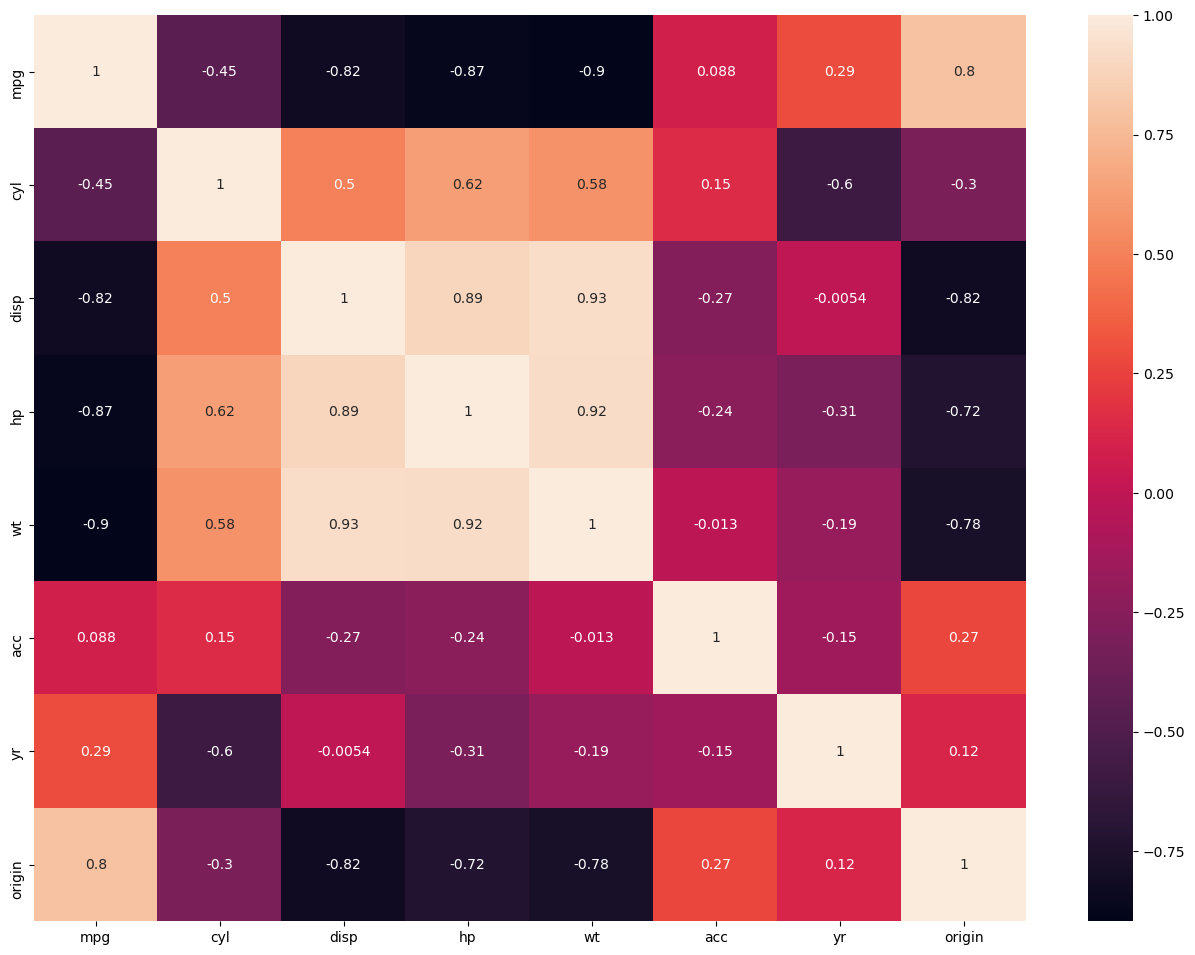

In [8]:
cmatrix =df2.corr()
plt.figure(figsize=(16,12),dpi=100)
sns.heatmap(cmatrix,annot=True)
plt.savefig('heatmap.png')

1. It is identified that the wt,hp and engine displacement have directly proportional correlation.
2. It is also identified that the wt,hp,disp and miles per gallon have inversely proportional correlation.
3. Engine displacement and year features do not have any correlation and near to zero

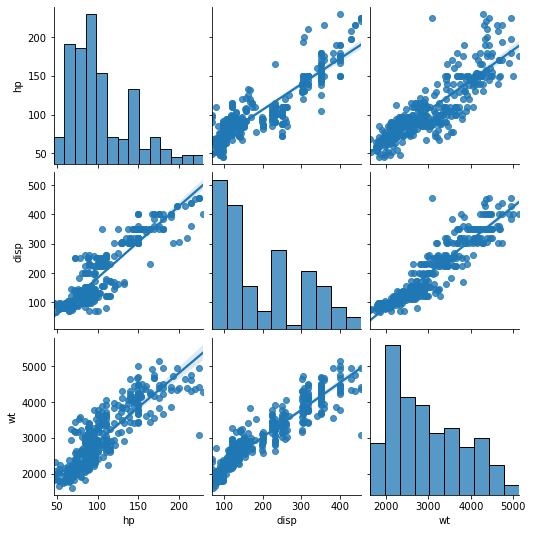

In [9]:
df2=df1[['hp','disp','wt']]
sns.pairplot(df2,kind='reg')

Above plot shows that the relationship between hp, weight, displacement is very srong and linear or directly proportional.

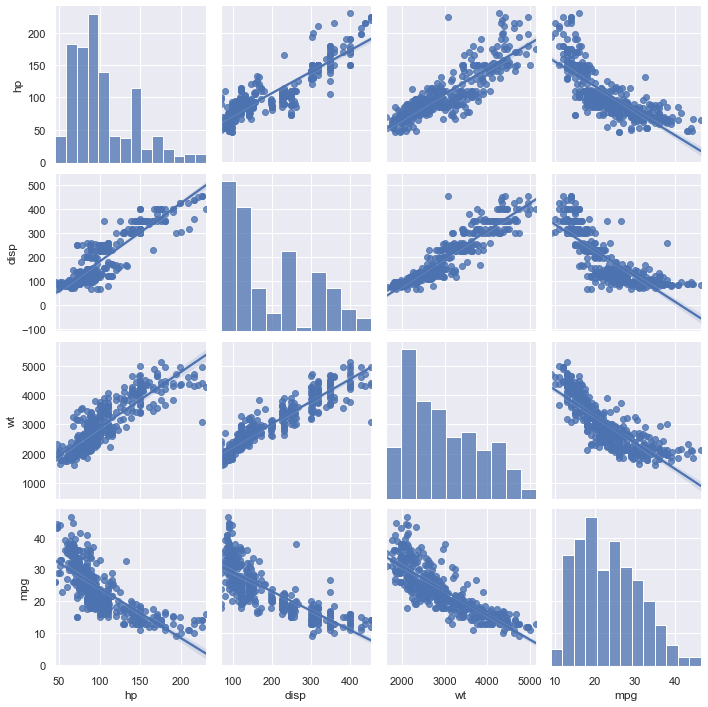

In [25]:
df3=df1[['hp','disp','wt','mpg']]
sns.pairplot(df3,kind='reg')

1. The mpg or miles per gallon slop is negetive and this is very similar to what we have seen in the heatmap ( black)
2. This proves that when power increases, milage decreases

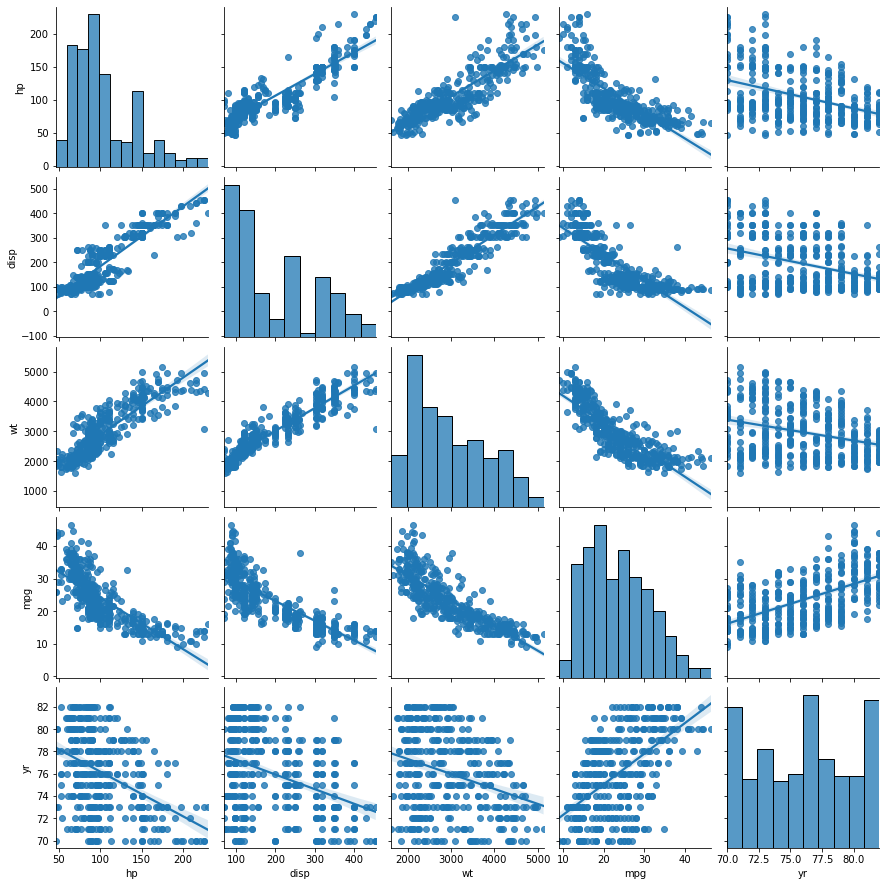

In [11]:
df4=df1[['hp','disp','wt','mpg','yr']]
sns.pairplot(df4,kind='reg')

The year of manufacturing do not have any relation with the hp,disp or mpg. Year feature is not useful for any decision making and predicion for other four.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

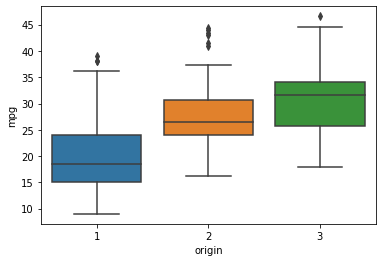

In [12]:
df5=df1[['mpg','origin','hp']]
sns.boxplot(x=df5.origin,y=df5.mpg)

It is evident that Japanese cars are high in fuel efficiency, where as American cars are very low in mpg 

<AxesSubplot:xlabel='origin', ylabel='hp'>

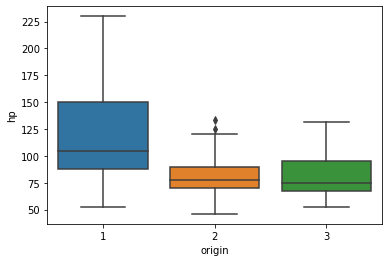

In [13]:
df5=df1[['mpg','origin','hp']]

sns.boxplot(x=df5.origin,y=df5.hp)

American cars are very high in power compared to European and Japanese.

[Text(0, 0, 'chevrolet'),
 Text(1, 0, 'buick'),
 Text(2, 0, 'plymouth'),
 Text(3, 0, 'amc'),
 Text(4, 0, 'ford'),
 Text(5, 0, 'pontiac'),
 Text(6, 0, 'dodge'),
 Text(7, 0, 'toyota'),
 Text(8, 0, 'datsun'),
 Text(9, 0, 'volkswagen'),
 Text(10, 0, 'peugeot'),
 Text(11, 0, 'audi'),
 Text(12, 0, 'saab'),
 Text(13, 0, 'bmw'),
 Text(14, 0, 'chevy'),
 Text(15, 0, 'hi'),
 Text(16, 0, 'mercury'),
 Text(17, 0, 'opel'),
 Text(18, 0, 'fiat'),
 Text(19, 0, 'oldsmobile'),
 Text(20, 0, 'chrysler'),
 Text(21, 0, 'mazda'),
 Text(22, 0, 'volvo'),
 Text(23, 0, 'renault'),
 Text(24, 0, 'honda'),
 Text(25, 0, 'subaru'),
 Text(26, 0, 'capri'),
 Text(27, 0, 'mercedes'),
 Text(28, 0, 'cadillac'),
 Text(29, 0, 'triumph'),
 Text(30, 0, 'nissan')]

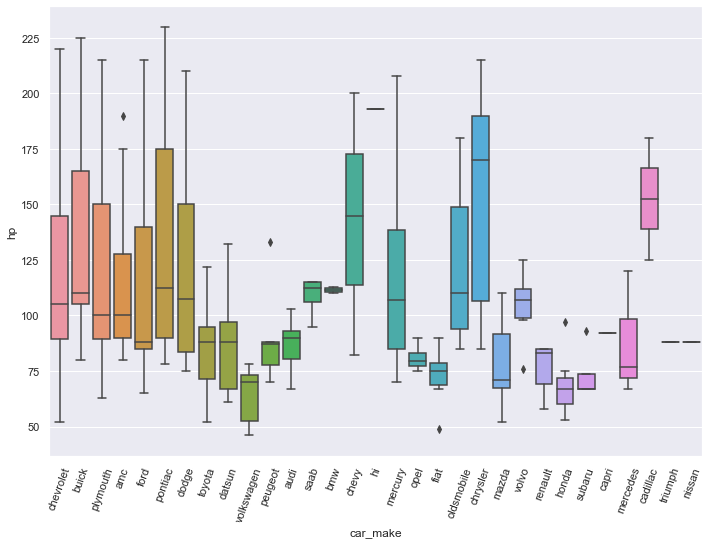

In [14]:
df5=df1[['mpg','car_make','hp']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.plotting_context(font_scale=10)
g= sns.boxplot(x=df5.car_make,y=df5.hp)
g.set_xticklabels(g.get_xticklabels(),rotation=70)

dict_items([(1, <AxesSubplot:title={'center':'origin = 1'}, xlabel='Car Make', ylabel='mpg'>), (2, <AxesSubplot:title={'center':'origin = 2'}, xlabel='Car Make'>), (3, <AxesSubplot:title={'center':'origin = 3'}, xlabel='Car Make'>)])
<class 'dict_items'>


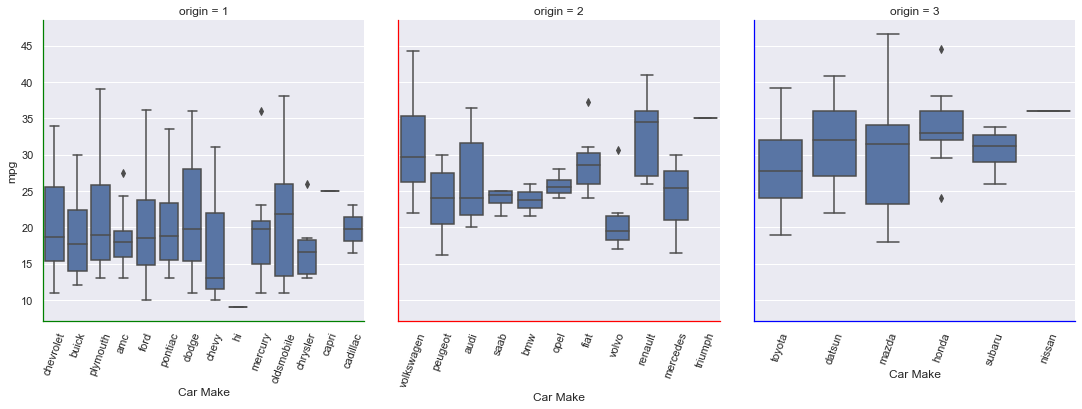

In [15]:
#sns.set(rc={'figure.figsize':(21.7,15.27)})
#g= sns.FacetGrid(df1,row='car_make',col='cyl',height=5,sharey=False)
#g.map(sns.distplot,'mpg',bins=10,kde=False,hist=True,norm_hist=False)
d = {'color': ['r', 'g','b']}
sns.set(rc={'figure.figsize':(20,10)})
sns.plotting_context(font_scale=10)

g= sns.FacetGrid(df1,col='origin',height=5,sharex=False)
g.map_dataframe(sns.boxplot,x='car_make',y='mpg')

g.set_axis_labels("Car Make", "mpg")
g.set_xticklabels(rotation=70)
print(g.axes_dict.items())
print(type(g.axes_dict.items()))
for col_val, ax in g.axes_dict.items():
    if col_val == 1:
        plt.setp(ax.spines.values(), color='green')
    elif col_val == 2:
        plt.setp(ax.spines.values(), color='red')
    else:
        plt.setp(ax.spines.values(), color='blue')
 
        
        
       